# Python hands-on with the five things a computer can do
Carl provided a notebook with a high-level overview of the basic building blocks of pretty much any coding task. In this notebook, we'll put all of those into action to explore what seems like it should be a fairly simple question: in any given year, how many of the books printed by William Bowyer were by living authors, and how many were by dead ones? We won't take up those basic tasks in the same order as Carl's discussion, but rather as they crop up in the course of our task—I'll try to highlight where each of the things we do fits under those broad headings. 

If you haven't done much coding before, it may seem like there end up being an awful lot of steps involved, but what we're doing is breaking down that broad question into the smaller "computationally tractable" tasks it takes to answer it. Not all of those tasks immediately jump to mind as part of the larger problem, but we can't proceed without them (to consider the data in a file, for example, you first have to *open* the file). If you spend more time doing this kind of work, a lot of what we'll do in this note book will come to seem completely routine.

If you *have* done a fair amount of coding before, you'll probably have immediately started thinking through how you'd go about exploring the question (or could start coming up with a plan in a minute or two). This notebook is meant to walk through some of the practical steps to approaching a book historical question through code, and to offer a quick introduction to some Python basics as we go.

### Preliminary observations and caveats
The aim of this notebook is to illustrate basic coding patterns using what could be a real book historical question. As with anything, though, we need to know something about the data we're working with in order to put it to good use. In this case, it's worth pointing out that, if we wanted a *real* answer to this question, these data would be sort of problematic: the ESTC includes records that may represent variant states of what we would really consider the same book, so the counts we'll come up with would need to be viewed with some skepticism. 

It's also true that I took this selection of ESTC records associated with William Bowyer mostly because it was convenient to do so: all the information in the *Bowyer Ledgers* edited by Keith Maslen and John Lancaster has been added to ESTC records (by Lancaster, himself, as I understand), so I could be pretty confident that I was getting all the appropriate records. As a book historical question, though, it would probably make more sense to frame this question in terms of the *booksellers* who published living vs. dead authors, rather than looking at the printing house that did the work.

## Let's just think about the problem for a second
If we were to look at any given record, chances are we would have no problem whatsoever saying whether the author of the book was alive or dead at the time of publication—the question is so simple that you could answer it without really having to think about it. 

But it's worth pausing to consider *how* we answer this question so easily: what are the steps we actually go through to decide, even if we move through those steps so quickly that they don't even feel like steps, but rather a single, instantaneous insight? Because we're going to have to make those steps explicit if we're going to make them happen in code.

This is information from the first five records in the file we're going to be working with. It's not all the information in those records, by any means, but this is probably the information we'd be paying the most attention to if we were looking at these records in a tab in our browser. 

>* Davila, Arrigo Caterino,(1576-1631). *The history of the civil wars of France*. (London:printed for D. Browne..., MDCCLVIII. \[1758\]).
>
>* Holland, Richard,(1688-1730). *Observations on the small pox: or, An essay to discover a more effectual method of cure*. (London:printed for John Brindley...,1728).
>
>* Hasledine, William,(1713 or 14-1773). *The beau and the academick*. (London: printed for J. Roberts,\[1733\]).
>
> * Clarke, John,(1687-1734).*A new grammar of the Latin tongue, comprising all necessary for grammar-schools*. (London: printed for L. Hawes, W. Clarke, and R. Collins..., M.DCC.LXVII. \[1767\]).
>
> * Spinckes, Nathaniel,(1654-1727). *The new pretenders to prophecy re-examined*. (London: printed for Richard Sare..., 1710).

Take a minute or to think about the mental processes involved in deciding whether the author of the work was alive or dead in the year the book was published and jot a phrase/sentence or two about them in the cell below. Also take note of anything you see in these summaries that might cause you to have to spend a fraction of a second longer considering some of them. 


In [ ]:
#Jot down some notes on how you go about answering the simple question of 
#whether the author of the record was living or dead in the year of publication.







## Getting the tools we need
In an example of what Carl termed "**distributed code reuse**," our first task is to get a Python package to help us read MARC records. If you've spent any time poking around in library catalogs (and you probably have, since you're at Rare Book school), you may have come across something called "MARC view" or "staff view" that shows the content of the catalog record alongside numeric field codes. This is the ESTC's "MARC tags" view for ESTC T228088, for example:

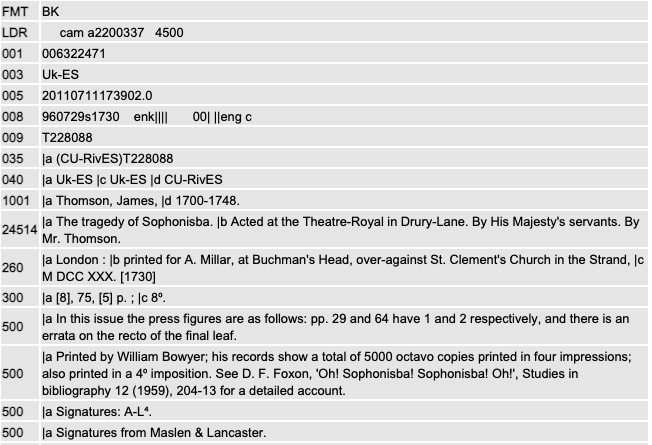

What that actually is is a human-friendly formatted *display* of the data in the catalog record. This is what the record looks like before being formatted for display:
```
01505cam a2200289  
450000100080000000300100000800500170001800800410003500900110007603500220008704000270010910
000320013624501170016826000450028530000270033050001490035750002600050650000240076650000400
0790510004600830510004600876510004600922533017400968648002101142650001601163752003601179
T228088CU-RivES 20090302175112.0960729s1730    enk||||       00| ||eng c006322471  
a(Uk-ES)006322471   aUk-EScUk-ESdCU-RivES1 aThomson, James,d1700-1748.14aThe
tragedy of Sophonisba.bActed at the Theatre-Royal in Drury-Lane. By His Majesty's
servants. By Mr. Thomson   aLondon :bprinted for A. Millar,c1730.   a[8],75,[5]p.
;c8⁰.   aIn this issue the press figures are as follows: pp. 29 and 64 have 1 and 2
respectively, and there is an errata on the recto of the final leaf.   aPrinted by
William Bowyer; his records show a total of 5000 octavo copies printed in four
impressions; also printed in a 4⁰ imposition. See D. F. Foxon, 'Oh! Sophonisba!
Sophonisba! Oh!', Studies in bibliography 12 (1959), 204-13 for a detailed account. 
aSignatures: A-L⁴.  aSignatures from Maslen & Lancaster.4 aMaslen & Lancaster. Bowyer
ledgers,c15164 aMaslen & Lancaster. Bowyer ledgers,c15194 aMaslen & Lancaster.
Bowyer ledgers,c1602  aMicrofilm.bWoodbridge, Conn. :cPrimary Source Microfilm, an
imprint of Thomson-Gale,d2007.e1 reel ; 35 mm.nUnit 475f(The Eighteenth Century ; reel
16622, no. 13).  7a1701-18002local 0aSophonisba.  aGreat BritainbEnglanddLondon.
```
(And I've actually cheated a bit by inserting line breaks to make it fit on the screen.) The record begins with a "leader" (in this case, `01556cam a2200289   4500`) that provides information about the [length, structure, and status of the record](https://www.loc.gov/marc/bibliographic/bdleader.html). 

The long string of numbers that follows is called the [directory](https://www.loc.gov/marc/bibliographic/bddirectory.html), and is a series of 12-digit sequences that tell us:
* Which MARC field we're talking about \[three digits\]
* How many characters long the content of the field is \[four digits\]
* The point in the record where the field content begins (that is, at which character) \[five digits\]

So the string `001000800000`, for example, says that field 001 is 8 characters long and starts at character 0. That's immediately followed by `003001000008`: field 003, 10 characters long, starting at character 8, and so on.

There's a reason "MARC" stands for "**MA**chine-**R**eadable **C**ataloging.

Given the predictable structure of a MARC record, we *could* write code that would work through the record directory and then grab the text we want from the appropriate spot in the record. But that's already been done quite well by Ed Summers, the author and maintainer of the [`Pymarc` package](https://pypi.org/project/pymarc/) for Python, so it makes a lot more sense to install that package so we can set to work right away. To follow Carl's tool metaphor, there's no need for us to machine our own wrench to deal with a particular kind of bolt when somebody else has already made exactly the wrench we need to do the job and has let us know we can use it any time.

`Pymarc` is a specialized-enough package that it's not going to be installed by default with Python. So we'll download it via its reference in the [Python Package Index](https://pypi.org/) and install it using `pip` ("Package Installer for Python"). 

(Note that this `pip` installation isn't happening in Python code. Rather, we're installing it using a terminal command—the exclamation point at the beginning of the line tells Google Colaboratory that this is a different kind of instruction. You can do the same thing in Jupyer Notebooks running under Anaconda or just a straight installation of Python on your computer. If you needed to have `Pymarc` available for free-standing Python scripts that you were running on your computer, you'd need to make that it was installed in your Python environment.)

In [ ]:
#Download and install the Pymarc package so that it's available for use in our
#Python environment
!pip install pymarc

We've now *installed* `Pymarc`, but to actually make use of it in our script, we need to `import` it. In this case, we just need the `MARCReader` module, so that's what we'll `import`.

In [ ]:
#Import the MARCReader module from the Pymarc package.
from pymarc import MARCReader

## Opening a MARC file
With `Pymarc` installed and the `MARCReader` module available to our script, we're ready to start dealing with MARC records! Awesome. Now we need some MARC records. And those are in a file. So we have to open a file, which obviously brings us to another of Carl's five things (**input and output**), but also—perhaps somewhat less obviously—brings us to another of the five things: **variables**.

We want to open a file that you have in the `rbs_digital_approaches_2021/data_class` folder that you've cloned from GitHub  to Google Drive. To do that, we first have to import some code that allows Google Colaboratory to talk with Google Drive (more distributed code reuse).

When you run the cell below, you'll be prompted to authorize Colaboratory to access your Google Drive. Click on your account to authorize (there might be another step to assure Google Drive you really mean it). Then copy the code that Google Drive will give you, paste it into the text entry box that will appear in the output cell, and hit `enter`.

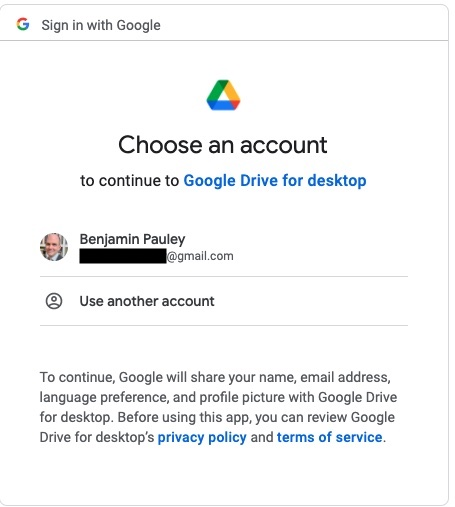

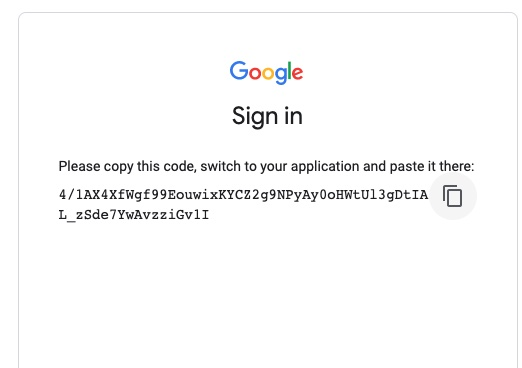

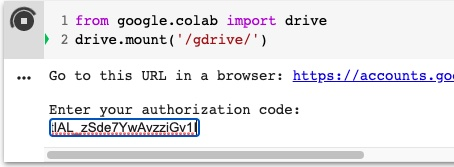

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

To actually work with any of our files, we'll need to provide a full file path to each file we want. Since all of those files are going to be in the same place (and since typing the same file path over and over gets tedious and introduces more opportunities for error), let's just create a variable to hold the path to the directory we want. Then, any time we need to get a file in this directory, we can just use the variable name instead of re-typing the full path.

In [ ]:
directory_path = '/gdrive/MyDrive/rbs_digital_approaches_2021/data_class/'

This next cell presents the most common way of opening a file in Python. There are a couple of different things going on here, which can make this convention a little confusing at first.

Before getting into the content of the lines, first note the structure: the first line begins with `with` and ends with a colon, which is setting a **condition** for the code that follows (this is one example of the kind of **control structures** that Carl's notebook mentions). Notice, especially, that the second line is indented. This is important because, in Python, *whitespace has meaning*. Other languages would require some more explicit signals about the structure of that command, but Python infers just from the whitespace that the code in line two happens "inside" the code on line one. If line two weren't indented properly, we'd end up with an error.

Now for the content of the lines. We're using the `open` command and giving it two "arguments" inside the parentheses: 
1. The path to the file we want to open (which I've built up here by using the `directory_path` variable and adding the name of the specific file I want—here's some of Carl's "**basic math**" in action, just not on anything that looks like numbers).
2. The way we want to open the file. In this case, `rb` stands for "readable" and "binary" (as opposed to text: `MARCReader` wants to read the MARC records as bytes). We'll see other variations later.

Then—still in line 1—we're creating a new variable (`marc_file`) to represent the file we've just opened. This part can be a little confusing because it's not necessarily obvious that the word `as` would mean something like "Create a new variable and assign a value to it," but that's what's implicit in that formula. (Opening files is something you have to do a lot, so having a very terse, economical syntax for doing it is a real convenience.) 

Line two creates *another* variable (`marc_reader`). The value of that variable isn't simply the contents of our MARC file, however. Rather, we're giving our MARC file to the `MARCReader` module to handle (saying, in effect, "Uh, you know how to read this stuff, right?"). From now on, we'll use `marc_reader` to refer to the representation of our file that the MARC-savvy `MARCReader` module constructs. `MARCReader` will then allow us to deal with the contents of the MARC records in our file in ways that are more congenial for Python coding.

Go ahead and run the next cell—you won't get any output at this point, because all we've done is open the file and make its contents available to our script.



In [ ]:
#Open a file in readable binary mode and refer to it as marc_file
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  #Give marc_file to MARCReader and refer to whatever we get back as marc_reader
  marc_reader = MARCReader(marc_file)

One virtue of this approach is that the file is opened in the context of the `with` statement, and when that `with` statement completes, Python automatically closes the file for us (so that it's not hanging out in memory). 

Because of the modular nature of Jupyter notebook cells, though, that's slightly less of a virtue in this notebook. The `with` statement completed when the prior cell finished running, so the `marc_reader` variable isn't available to subsequent cells. So when I said "and make its contents available to our script," I really ought to have said "and make its contents available to our script in this cell." If we try to do anything with `marc_reader` now, though, we'll get an error:

In [ ]:
for record in marc_reader :
  print(record)

If there's a good way to make file objects persist across cells in a Jupyer notebook, I haven't found it yet. That just means we'll have to open that file every time we want to work with it.

## Iterating through the records with MARCReader
We know that our MARC file has more than one MARC record in it. That makes this file a good candidate for **iteration**: let's work through the file and look at the records one at a time using the **control structure** of the `for` loop.

Notice how line 3 (beginning with `for`) is indented to be "inside" the `with` statement, and that line 4 is indented to be "inside" the `for` loop—we have a nested control structure here, and it's all signaled by white space.
 
Our `for` loop creates, in passing, yet another **variable** (`record`). It says, essentially:
* `marc_reader` contains an unknown number of things. Let's agree to call each of those things `record` in turn.
    * Print the contents of every `record`.

(In this cell, we're starting with a very small subset of the records we'll work with eventually—the full file is large enough that Colaboratory will complain about the I/O rate and cut our notebook off temporarily).

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)  
  #For every record we find in marc_reader...
  for record in marc_reader :
    #Print the record
    print(record)

Now we know that there are, in fact MARC records, but just printing out the full record doesn't do us much good. Let's get just a single field from each record.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    print(record['245'])

Okay, but we're still getting stuff we don't want, like the field codes, the MARC indicators, and subfield codes. Let's just get the text content of the subfield of field 245 that holds thew main title.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    print(record['245']['a'])

While we're at it, let's construct a variable of our own that will hold both the main title at the continuation of the title as a text string. This involves more "basic math" because we'll first create our `full_title` variable by assigning the content of the main title field (`[245][a]`) "plus" the content of the title continuation field `'245][b]`). 

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    full_title = record['245']['a'] + record['245']['b']
    print(full_title)

If you look closely, you'll notice a little problem with the `full_title` variable we created in the last cell:
>
```
The history of the civil wars of France.In which are related, ...
...more effectual method of cure.By Richard Holland...
The beau and the academick.A dialogue in...
...necessary for grammar schools.To which is annexed...
```
>
Our script did exactly what we said: it took the string of text in `[245][a]` and added the string of text in `[245][b]` to it. We never said anything about putting a space between those two strings of text

Based on what we've seen about "adding" strings of text together in the last cell, try to construct the `full_title` variable to address the problem of the missing space.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    #Construct the value of the full_title variable in a way that includes a
    #space between the content of the two subfields
    full_title = 
    print(full_title)

### Conditionals
Printing out the title for every record is a safe bet because every record *has* to have something in the 245 field—you can't have a book without a title.

But look what happens when we try to print out the contents of field 100, subfield a: the author's name

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    print(record['100']['a'] + ' ' + record['100']['d'])

Whoops. Something's not working with the last record. Let's have a look.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    print(record)

It turns out not every record has a `100` field. This record doesn't have any author field. Other records might have a corporate author, which is a `110` field, rather than `100`. (The `Pymarc` package actually has an `author()` method for getting the content of any author field, but that wouldn't have done us any good in this case. And we're really only interested in `100` fields: for our purposes, at least, corporations are not people.)

Let's put in a **conditional** statement to first see if there *is* a `100` field before trying to print the author's name

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      print(record['100']['a'] + ' ' + record['100']['d'])
    else :
      print('No 100 field')

### Try this for yourself
In the cell below, write code that will:
1. Open the MARC file we've been working with;
2. Pass that file to MARCReader
3. Iterate through the records and print:
    * The contents of field 100, subfield a and field 100, subfield d, **if that field exists**
    * The contents of field 260, subfield c, **if that field exists**

In [ ]:
#Your code goes here:


### One solution
If you're running into trouble, click to reveal a solution.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      print(record['100']['a'] + ' ' + record['100']['d'])
    if record['260'] :
      print(record['260']['c'])

## Getting the information we need
As you saw, field 260, subfield c gives the date *as it appears on the title page*, which presents some issues for what we want to do: we'd need to figure out how to get a clear year out of a field that might look like "MDCCLXVIII. \[1758\]." That's not impossible by any stretch of the imagination, but it sure would be nice if there were an easier way. 

As it happens, there just may be. The MARC 008 field is a structured data field that tells us about things like country of publication, language, and date of publication. Let's have a look at that field. (Note that MARC "control fields," including 008 field, don't have subfields, so we need to use `.data` to get the content of those fields.)

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    print(record['008'].data)
    

Looking at [the documentation for the 008 field](https://www.loc.gov/marc/bibliographic/bd008a.html), we can see what parts of this fixed-length field are actually helpful to us. 
* Character 6 tells us what *kind* of date (or dates) the field provides: a single year, multiple years, etc. (There are only single years in this subset, but there are other combinations to be found in the full set.)
* If there's only one year, we'll find it in characters 7-10; if there are two years, characters 7-10 will give us the first year and characters 11-14 will give us the second year.

This is one of those cases where we'd really need to know our data better to know what would give us the *best* answer, but for demonstration purposes, let's just treat the first year (that is, the one in characters 7-10) as our publication year.

### Slicing a substring from a longer string
We can get just the characters that interest us by indicating a starting and ending point in the string (a position like this is referred to as an "index"). The MARC documentation tells us exactly which characters, so let's try getting our string from character 7 to character 10.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    print(record['008'].data[7:10])

Hrm. The way Python handles indices can be a little confusing at first. The starting index is inclusive—that is, if you start with character 7 (or item 7 in a list), you'll get character 7. But the ending index is *exclusive*: we get up to *but not including* character 10. As strange as this may seem at first, it's actually kind of nice: we can always know how many items we're getting by subtracting the starting index number from the ending index number. So, `[7:10]` will only get us three characters. Go ahead and change the code to get the four characters we actually want.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    #Fix the indices to get four characters (*including* character 10)
    print(record['008'].data[7:10])

### More ways of manipulating strings of text
We're in pretty good shape for the publication years. Now let's turn to the authors' dates. We'll stick with the subset of records we've been working with for the time being to figure out an approach that will work for most of our cases, but then we'll look at a different subset selected to bring certain problems into view.

Let's begin by just looking at the authors' dates again.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      print(record['100']['d'])

The `008` field has a predictable, fixed length: every `008` field is like every other. There's more variability here. Using a slicing approach like `record['100]['d][5:9]` would get us the right result for four of the five cases above, but in one case it would produce "or 1". So that's not going to work. But there are other ways to solve this problem.

#### Finding a substring
We know we want the digits after the hyphen, it's just that we can't know ahead of time where the hyphen will be in every string of text we find in a 100|d subfield.

But if we can find the hyphen, we'd at least have a way of knowing our starting index. We can use Python's built-in `find()` method to locate the hyphen. The way this is written can be confusing at first: `find()` is a string method, so we start by giving the string we're interested in searching and then attaching the `find()` method to it: `haystack.find('needle')` 

(That's metaphorical, by the way: if we tried literally that search, we'd get a result of -1, meaning that the string "needle" can't be found in the string "haystack." But if we tried `haystack.find('y')`, we'd get a result of 2: the index of the first occurrence of y. Remember that we start counting at 0.)

To make the code in the next cell easier to read, I'll create a variable called `dates` to hold the content of the 100|d subfield. In line 6, I'm slicing the `dates` variable just like we did the 008 field. But instead of hard-coding a number for the starting index, I'm using the result of the `find()` method. Remember, though, that these slices are *inclusive* of the first index. So if we just use the position of the hyphen as our starting index, we'd include the hyphen in our string. This presents another opportunity for basic math: we'll take the position of the hyphen and add 1 to it.

For now, we'll just use the starting index and a colon with nothing after it to show a feature of slicing in Python: if we provide only a starting index and no ending index, we'll get a substring that begins where we designated and continues to the end of the string.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      dates = record['100']['d'] 
      print(dates[dates.find('-')+1:])

Note that this works for ending indices as well: if we didn't provide a starting index, but just a colon and an ending index, we'd get a substring that started at the beginning of the string and went up to—but didn't include—the ending index. We could use this approach if we wanted everything *up to* the hyphen, rather than everything after it. (Because ending indices are exclusive in slices, we *wouldn't* add 1 to the ending index, but rather just use the index of the hyphen so we could leave it out of our substring.)

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      dates = record['100']['d'] 
      print(dates[:dates.find('-'):])

##### Finding from the end, rather than the beginning

`find()` also has a start-from-the-end corollary in `rfind()` ("right find," i.e., find from the right of the string). So we could started searching for our hyphen from the end of the string instead of the beginning. (It doesn't make any difference in this sample, since there's only ever one hyphen. But who knows what we might encounter in an unstructured field of text?)

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      dates = record['100']['d'] 
      print(dates[dates.rfind('-')+1:])

Either way, we need to get rid of the period at the end of the string, and there are several different approaches we could take. We could use `find()` again to find the period and use its position as our ending index. (Since slices are exclusive of the ending index, we could just use the position of the period without having to do any math: our string will go up to but not including the period.)

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      dates = record['100']['d'] 
      print(dates[dates.find('-')+1:dates.find('.')])

#### Slicing with negative indices
We can also use negative numbers as indices: rather than counting from the beginning of the string, we count backwards from the end. To exclude the last character of the string, we could have our slice start at the position of the hyphen (plus 1) and go up to (but not including) -1.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      dates = record['100']['d'] 
      print(dates[dates.find('-')+1:-1])

This possibility of starting from the end rather than the beginning is a more general pattern in Python (as we saw with `rfind()`). If we knew that our date fields were always going to end in a hyphen, four digits, and a period, we could slice the field this way:

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      dates = record['100']['d'] 
      print(dates[-5:-1])

#### String stripping
Python also has a couple of built-in methods for getting rid of unwanted bits at the ends of strings:

* `strip()` eliminates text from both ends of a string
* `lstrip()` eliminates text from the left end of a string
* `rstrip()` eliminates text from the right end of a string

By default (that is, if we don't pass any arguments), all of these functions will eliminate white space. But if there are specific patterns we want to eliminate, we can pass those to any of the `strip()` functions, instead.


In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      dates = record['100']['d'] 
      print(dates[dates.find('-')+1:].rstrip('.'))

#### Splitting a string to a list
So far, all of our approaches have involved finding the hyphen in our string and using its location to slice the string—we've just used a few different methods after that. 

If there's a character we know serves as a separator between different parts of a string that we're interested, we can use the `split()` to split the string apart every time we encounter that separator and store the individual components as a list.

As you'll see, lists appear in square brackets with their individual items separated by commas. Because the items in our lists are all strings, each item will appear in single quotation marks. (Note, though, that a list can contain items of different types—strings, numbers, other lists, etc.)

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      date_string = record['100']['d'] 
      dates = date_string.split('-')
      print(dates)

Working with the elements of a list is going to look a lot like what we've been doing in getting substrings of longer strings, because items in lists also have indices, and they behave the same way:

* `my_list[1:5]` would get the second through fifth items in a list
* `my_list[2:]` would return everything from the third item of the list to the end
* `my_list[:-1]` would return all of the items except the last

Let's have a look at the structure of a list using `enumerate()` (which explicitly returns list indices as well as values). 

* First, we'll print the list, itself, again. 
* Then we'll iterate through the enumerated list using a `for` loop to show the `index` and `value` of each item in the list.
* Finally, we'll print out each item in the list individually using its list index



In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      date_string = record['100']['d'] 
      dates = date_string.split('-')
      print(dates)
      #Note: another for loop
      for index, value in enumerate(dates) :
        print(index, value)
      print(dates[0])
      print(dates[1])

Our `dates` lists only have two items, of course. But we can get each item in the list by using its index. In the cell below, I've split the `date_string` to create a `dates` list. Fill in the code to assign items from the `dates` list to two new variables (`birth_year` and `death_year`).

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      author_name = record['100']['a']
      date_string = record['100']['d'] 
      dates = date_string.split('-')
      #Assign values to the variables birth_year and death_year, using the list index of
      #the appropriate item in the dates list
      birth_year = 
      death_year = 
      print(author_name)
      print('--Birth year: ' + birth_year)
      print('--Death year: ' + death_year)

#### Solution
If you're having trouble, click here to reveal a solution.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      author_name = record['100']['a']
      date_string = record['100']['d'] 
      dates = date_string.split('-')
      #Assign values to the variables birth_year and death_year, using the list index of
      #the appropriate item in the dates list
      birth_year = dates[0]
      #Let's go ahead and remove the period from the end of the death year now, 
      #rather than having to do it in a second step.
      death_year = dates[1].rstrip('.')
      print(author_name)
      print('--Birth year: ' + birth_year)
      print('--Death year: ' + death_year)

### You thought we were pretty much in the clear at this point, didn't you?
So, that's been taking shape nicely: we know how to get publication years from the 008 field without having to get into any messiness with Roman numerals or anything in the 260|c field, and we have several different ways to isolate death years in the 100|d field.

Let's have a look at a different subset of our MARC records, though, because there are some more wrinkles we're going to have to deal with.



In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_problem_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      author_name = record['100']['a']
      #A new wrinkle in this particular set...
      if record['100']['c'] :
        author_name += ' ' + record['100']['c']
      date_string = record['100']['d']
      print(author_name + ' (' + date_string + ')')

Oh boy. Some of these dates fields are going to present problems for us. We know when Ashley Cooper died, at least, even if we don't know when he was born. We know *that* John Sheffield, Duke of Buckingham died, but there's some anbiguity about exactly when. But we only have birth years for William Ogilby and Stephen White. We have birth and death years for Marianne Agnès Pillement Fauques, but they're both approximate. And J. Wright only gets a "fl." How much confidence can we have in those dates as a guide to his/their lifespan?

### Introducing Regular Expressions
Regular expressions provide us with a way for searching for *patterns* of text, even if we don't know the specific form that the text will take. 

Consider US phone numbers, for example, which often take the form of (xxx) xxx-xxxx. A phone number should only include numerical characters, and not letters (let's set aside the fact that telephone numbers can be formatted differently, and especially the fact that business phone numbers are sometimes designed to spell a word on the telephone keypad as a kind of mnemonic device. I'm looking at you, 1-800-FLOWERS). So if you wanted to detect telephone numbers in a document, you would look for any continuous string of 14 characters that followed the pattern:

* Open parenthesis
* Three digits (0-9)
* A space
* Three digits (0-9)
* A hyphen
* Four digits (0-9)

Written as a regular expression, that might take the form: 
> `'\([0-9]{3}\)\s[0-9]{3}\-[0-9]{4}'`

It looks like there's a lot going on there, but it's really not so bad. 

This regular expression starts with a backwards slash because certain characters—including parentheses—have special meanings in regular expressions, so when we actually want to find those characters, we need to make sure that our regular expression evaluates them as text, and not as part of the refgular expression. (A good example in this regular expresison is the hyphen. Note how there's a hyphen each time we see `0-9`, for example. *Those* hyphens means "in the range of zero to nine." When we come to the hyphen in the middle of the phone number, we need to "escape" it so that our regular expression will look for a hyphen character). 

The square brackets enclose sets of characters that *could* appear in the pattern we're looking for. In this case, that's just `[0-9]`, but we could also see things like:
* `[A-Z]` (upper-case letters)
* `[a-z]` (lower-case letters)
* `[A-Za-z0-9]` (any mix of upper-case letters, lower-case letters, and numbers
* `[cho]` (lower-case letters c, h, or o, specifically)
 
There are other special patterns that we may encounter this week, but rather than getting into it all now, we'll just try to explain them as they come up.

Regular expressions can be *extremely* useful, but also kind of confusing. We've provided a handout with a crash course on regular expressions which you might find helpful, and there are also lots of resources available online to help you master them. (Especially helpful are interactive sites like [RegEx101](https://regex101.com) and [RegExr](https://regexr.com).) 

Regular expressions can get pretty complex and confusing, but sometimes fairly simple ones will get the job done.

#### Dealing with unhelpful date fields
For our purposes, there are a few different patterns that are going to spell different kinds of trouble (roughly in descending order of severity):
* Any date field that begins with "b." (There's no death year. We can't use this at all.)
* Any date field that begins with "fl." (Those aren't necessarily real dates. We shouldn't use these.)
* Any date field that contains "ca." 
  - If it's expressing approximation about the birth year (i.e., before the hyphen), we might be able to use it.
  - If it's expressing approximation about the death date (i.e., after the hyphen), we can't use it.
* Any date field that contains "or"
  - If it's expressing a choice between birth years, but the death year is solid, we're okay with it
  - If the birth year is solid, but the death year is uncertain, we're less okay with it
* Any date field beginning with "d." (At least we have a death year, though we should be on the lookout for other tricky bits like "d. ca. 1778"  or "d. 1750 or 51")

So there are actually several things we need to try to catch, but regular expressions should help. Rather than trying to explain the regular expressions and control structures here, I'll add comments to the code to explain things as we go. 

Note that I'm using `re.compile()` to define my regular expressions. I could simply write the regular expressions in my control structures, but I prefer to define them first for two reasons: 
1. It strikes me as usually more readable use a variable name as the first argument in `re.search()` or `re.findall()`, rather than a potentially gnarly regular expression.
2. It allows me to reuse the same regular expression in different places, if need be.

In [ ]:
#We need to import Python's re (Regular Expression) library to be able to work 
#with regular expressions
import re

#Compile a regular expression to match a series of four digits 
#(equivalent to [0-9]{4})
year_pattern = re.compile(r'\d{4}')

#Compile a regular expression to match strings with starting with "b." or "fl." 
#(any combination of one or two of the characters b, f, or l, optionally 
#followed by a period); OR (the "|" signals alternatives) including a hyphen, 
#optionally followed by a space, followed by the characters "ca", optionally 
#followed by a period.
born_flourished_cadeath = re.compile(r'^[bfl]{1,2}\.?|\-\s?ca\.?')

#Compile a regular expression to match any string starting with "d", optionally
#followed by a period.
died = re.compile(r'^d\.?')

#Compile a regular expression to match any string with "or" appearing after a 
#hyphen (that is, a hyphen followed by one or more character of any kind, followed
#by a space, the characters "or" and another space).
ordeath = re.compile(r'\-.+\sor\s')

with open(directory_path + 's1_d1_estc_bowyer_problem_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      author_name = record['100']['a']
      date_string = record['100']['d']
      print(author_name + ' (' + date_string + ')')
      #Look for occurrences of the year pattern (there should be either one or 
      # two,but some records may not have valid years [e.g. "17th-century"])
      if re.findall(year_pattern, date_string) is not None :
      
        #If the born_flourished_cadeath pattern is found (or, I guess, isn't
        #not found), we can't use this record.
        if re.search(born_flourished_cadeath, date_string) is not None :
          print('--Cannot use this date field.')
      
      
        #If the died pattern is found...
        elif re.search(died, date_string) is not None :    
          #Print the first (i.e. only) year
          print('--' + re.findall(year_pattern, date_string)[0])
      
        #If the ordeath pattern is found...
        elif re.search(ordeath, date_string) is not None :
          #Print the second (i.e., death) year
          print('--' + re.findall(year_pattern, date_string)[1])
          
        #In any other case, we should be dealing with a standard yyyy-yyyy pattern
        #So find all instances of the year_pattern and print the second one.
        else :
          print('--' + re.findall(year_pattern, date_string)[1])
      
      else :
        print('No valid dates')
      


#### Once more, with *functions*!
This is a bit of a digression, but this kind of checking a string to see if it meets certain conditions is the *kind* of thing we might want to be able to do in other contexts—it's a candidate for what Carl called **local code reuse**. Perhaps we could use the same logic to search added entry subject fields to see which books were written *about* living vs. dead people in a given year, for instance. It would be a shame to have to type all of that code all over again just because we wanted to check a 700 field instead of a 100 field.

I'll write this as a function that accepts one argument (I'm expecting a string of text). Everything else in this cell should look familiar from the previous cell. What this cell does, though, is to take the procedures from the previous cell and give them a name that can be called, as we'll see in the next cell. 

(**Note:** You need to run this cell for the `get_death_year` function to be available elsewhere in the notebook, but you won't see any output.)

In [ ]:
def get_death_year(date_string) :
  year_pattern = re.compile(r'\d{4}')
  born_flourished_cadeath = re.compile(r'^[bfl]{1,2}\.?|\-\s?ca\.?')
  died = re.compile(r'^d\.?')
  ordeath = re.compile(r'\-.+\sor\s')
  
  if re.search(year_pattern, date_string) is None :
    #We don't just want to print results now, we want to process a string and
    #produce a result. If there are no valid years, we need a way to return 
    #a result of None.
    result = None
    
  elif re.search(born_flourished_cadeath, date_string) is not None :
    #If we can't provide a *usable* year, we should also return a result of None
    result = None
      
  elif re.search(died, date_string) is not None :
    result = re.findall(year_pattern, date_string)[0]
      
  elif re.search(ordeath, date_string) is not None :
    result = re.findall(year_pattern, date_string)[1]
    
  else :
    result = re.findall(year_pattern, date_string)[1]

  return result

In this cell, I still have to read the MARC file and identify what field I want to check for a valid death year. But once I have that string, I pass it as an argument to the `get_death_year` function and receive a result.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_problem_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      author_name = record['100']['a']
      date_string = record['100']['d']
      
      #Call the get_death_year function, passing date_string as the argument
      death_year = get_death_year(date_string)
      
      #Depending on the result that the get_death_year function returns, do 
      #something
      if death_year is not None :
        print(author_name + ' died in ' + death_year)
      else :
        print('No death year for ' + author_name)

Now that `get_death_year` is available as a function, I can call it again when opening a different file without having to rewrite (or copy and paste) the code.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    if record['100'] :
      #You know, let's change around with this author name a little...
      author_name = record['100']['a'].rstrip(',')
      author_name_parts = author_name.split(', ')
      author_name = author_name_parts[1] + ' ' + author_name_parts[0]
      date_string = record['100']['d']
      death_year = get_death_year(date_string)
      if death_year is not None :
        print(author_name + ' died in ' + death_year)
      else :
        print('No death year for ' + author_name)

## Okay, we're ready to get going, but first a word about data types...
At this point, we're able to get publication years from the 008 field and we have a function for finding a valid death year, if there is one. There's just one thing that ought to give us pause: we've been treating all of these values simply as strings of characters, but while we recognize "1773" as a number, the computer doesn't necessarily know that we mean the integer 1,773, rather than just a sequence of the typographical characters "1", "7", "7", and "3".

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_sample.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    pub_year = record['008'].data[7:11]
    print('Publication year: ' + pub_year)
    print(type(pub_year))

Indeed, the fact that we can concatenate our variable `pub_year` with the text 'Publication year: ' is a bad sign. Compare the results of the next few cells.


In [ ]:
a = 7
text = 'Seven is also written '
print(text + a)

In [ ]:
b = '7'
print(text + j)

In [ ]:
c = 5
print(a * c)

In [ ]:
print(b * c)

This can lead to unexpected results.

In [ ]:
if b < '10' :
  print(b + ' is less than 10')
else :
  print(b + ' is greater than 10')

So the moral of this story is that we need to be a little bit cautious to make sure we're actually operating on the *kind* of data we think we are. A good practice (though, I gather, one that's not all that widespread) would be to [annotate our functions](https://www.python.org/dev/peps/pep-3107/) with information about the kinds of values they expect and return. 

I could have written the `get_death_year` function in such a way that it converted the year found in the string it receives to an integer, but then I wouldn't have been able to have this little illustrative digression.

Let's test out our process on the full set of MARC files, being sure to do math with actual numbers.

In [ ]:
with open(directory_path + 's1_d1_estc_bowyer_full.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    print(record['001'].data)
    #Get a substring from MARC field 008 and convert it to an integer
    pub_year = int(record['008'].data[7:11])
    if record['100'] :
      author_name = record['100']['a'].rstrip(',')
      #Just in case some records don't have a date for the author, at all,
      #as can happen with ancient authors as well as pseudonymous ones.
      if record['100']['d'] :
        date_string = record['100']['d']
        death_year = get_death_year(date_string)
        if death_year is not None :
          death_year = int(death_year)
          if death_year > pub_year :
            print(author_name + ' died in ' + str(death_year) + ', and so was alive in ' + str(pub_year))
          elif death_year == pub_year :
            print(author_name + ' died in the same year the work was published. Need more information.')
          else :
            print(author_name + ' died in ' + str(death_year) + ', and so was already dead by ' + str(pub_year))
      else :
        print('No dates for ' + author_name)

## Construct a data structure to hold on to all this information
In Python, as in other languages, there are different kinds of data structures that have different properties that make them well-suited to different uses. So far, we've only dealt with lists. Let's explore a somewhat more involved data type for holding all the information we're getting about living vs. dead authors.

A dictionary stores information in key/value pairs. That is, for each value there's a corresponding label. Dictionaries can hold any kind of data, including not just strings or integers, but also lists or other dictionaries (as well as another data type—the tuple—that we may run into later). So dictionaries can end up being complex, nested data structures, if need be.

For our purposes, let's keep track of living vs. dead authors for each year. One way to organize our data might be: 

```
{
  1710: 
        {'total_works': <integer-value>,
         'no_author': <integer_value>,
         'living_authors': <integer-value>,
         'dead_authors': <integer-value>,
         'ambiguous': <integer_value> 
        },
  1711: 
        {'total_works': <integer-value>,
         'no_author': <integer_value>,
         'living_authors': <integer-value>,
         'dead_authors': <integer-value>,
         'ambiguous': <integer_value> 
        },
...
  1778: 
        {'total_works': <integer-value>,
         'no_author': <integer_value>,
         'living_authors': <integer-value>,
         'dead_authors': <integer-value>,
         'ambiguous': <integer_value> 
        }
}
```


We'll need to iterate through our list of MARC records and update the number in each category for each year as we go. The way we work with dictionaries is a bit like how we work with lists, but instead of always having numeric indices, dictionaries have "keys" that can be strings, integers, or tuples. (This is the second time I've mentioned tuples: suffice it to say for now that they're [kind of like lists, but different](https://diveintopython3.net/native-datatypes.html#tuples).) 

So to get the values for a given year, we would give the dictionary name followed by the key in square brackets (e.g. `author_count[1730]`). Because the value for each year is *another* dictionary, we would get those values by providing the key for the nested dictionary (e.g., `author_count[1730]['total_works']`—note that, while `1730` is an integer, `'total_works'` is a string, so `'total_works'` needs to be in quotation marks, while `1730` doesn't).

For each record we encounter, the first thing we'll get is the publication year. If it's the first record we've seen for that year, we'll create a new entry in the dictionary using `setdefault()`: this creates a new key/value pair with default values. Our default value will be a dictionary with all of the nested values set to 0. If there's already key for our `pub_year` in the dictionary, we'll figure out which value in the nested dictionary we need to increase and then add one to that value.

In [ ]:
#Create an empty dictionary to hold our information
author_count = {}

with open(directory_path + 's1_d1_estc_bowyer_full.mrc', 'rb') as marc_file :
  marc_reader = MARCReader(marc_file)
  for record in marc_reader :
    #Get a substring from MARC field 008 and convert it to an integer
    pub_year = int(record['008'].data[7:11])
    
    #If we don't already have an entry in the author_count dictionary for this
    #year, create one, with the year as a key. Give that key a value of a 
    #dictionary starting with empty counts for all the categories
    author_count.setdefault(pub_year, {'total_works': 0,
                                       'no_author': 0,
                                       'living_authors': 0,
                                       'dead_authors': 0,
                                       'ambiguous': 0
                                       })
    #Immediately increase the number of total works—we don't know anything else
    #yet, but we know that much. 
    author_count[pub_year]['total_works'] += 1

    if record['100'] :
      author_name = record['100']['a'].rstrip(',')
      #Just in case some records don't have a date for the author, at all,
      #as can happen with ancient authors as well as pseudonymous ones.
      if record['100']['d'] :
        date_string = record['100']['d']
        death_year = get_death_year(date_string)
        if death_year is not None :
          death_year = int(death_year)
          if death_year > pub_year :
            author_count[pub_year]['living_authors'] += 1
          elif death_year == pub_year :
            author_count[pub_year]['ambiguous'] += 1
          else :
            author_count[pub_year]['dead_authors'] += 1
      
      #If there are no dates
      else : 
        author_count[pub_year]['ambiguous'] += 1
    #If there's no author at all
    else :
      author_count[pub_year]['no_author'] += 1

In [ ]:
for k, v in author_count.items() :
  print(k)
  print(v)

## Do something with these data
Now we have all our data in a dictionary, we'll want to do something with them so we can get a sense of the answer to our question. First we'll save the data to a .csv file, then we'll construct a (rudimentary) bar chart.

### Saving to a file
The convention for saving a file looks a lot like the convention for opening one: we open designate a destination file (but as writable rather than readable); we create a variable name to use to refer to that file; and then we act on the file. In this case, we'll use the `DictWriter` module of Python's built-in `csv` library to write our .csv, much as we used the `MARCReader` module of the `Pymarc` package to read our MARC files.

(I'm not going to say too much about what's happening here because we'll be doing this several more times in the coming days: you'll see this again.)

In [ ]:
#Import csv library and os library—in case we're trying to write a file to
#a folder that doesn't exist yet
import csv
import os

#Set a variable containing the path to the output directory. See if this 
#directory exists and, if it doesn't create it
output_directory = '/gdrive/MyDrive/rbs_digital_approaches/output/'
if os.path.exists(output_directory) is not True :
  os.makedirs(output_directory)

#Define a list of column names to use in our .csv file
csv_fieldnames = ['year', 'total_works', 'living_authors', 'dead_authors', 
              'no_author', 'ambiguous']

#Open our new (as-yet-blank) .csv file and tell the csv library how it should 
#treat that file
with open(output_directory + 'author_count.csv', 'w') as csv_output_file :
  csv_writer = csv.DictWriter(csv_output_file, delimiter=',', quotechar='"', 
                              fieldnames=csv_fieldnames)
  #Write our column headings
  csv_writer.writeheader()

  #Iterate through the items in our dictionary. Note we're creating two variables
  #here: one for the dictionary key ('years' here), and one for the dictionary
  #values.
  for year, values in author_count.items() :
    
    #Construct a dictionary representing each row in our dictionary. The keys
    #correspond to our fieldnames, the values are taken from the values in the 
    #author_count dictionary: values['total_works'] is really 
    #author_count[year]['total_works]
    row = {'year': year,
           'total_works': values['total_works'],
           'living_authors': values['living_authors'],
           'dead_authors': values['dead_authors'],
           'no_author': values['no_author'],
           'ambiguous': values['ambiguous']}
    
    #Write the row to our csv file
    csv_writer.writerow(row)

## Making a bar chart with plotly
It seems like we ought to at least have something to look at at the end of all this. Let's use the `plotly` package to draw a bar chart comparing the number of living and dead authors in each year .

In [ ]:
for k, v in author_count.items() :
  living = [v['living_authors']]
print(living)

In [ ]:
#Import the module we need from the plotly package. (Plotly is installed by 
#default in Google Colaboratory. In another environment, you might need to 
#install it using pip)
import plotly.graph_objects as go

#Create empty lists for the years that we'll use as our x axis and for the counts
#that we'll chart on our y axis
years = []
living_counts = []
dead_counts = []

#Iterate through the keys and 
for year, values in author_count.items() :
  years.append(year)
  living_counts.append(v['living_authors'])
  dead_counts.append(v['dead_authors'])

#There's a more compact syntax for creating those lists, but one that might be 
#a little opaque if you're new to Python:
#years = [k for k, v in author_counts.items()]
#living_counts = [v['living_authors'] for k, v in author_counts.items()]
#dead_counts = [v['dead_authors'] for k, v in author_counts.items()]

#Create the chart using the plotly graph objects module. The "data" is a list of 
#two graph_objects "bars," each of which has a label ("name"), and each of which 
#takes its values for the x and y axes from the lists we constructed above.
fig = go.Figure(data=[
    go.Bar(name='Living', x=years, y=living_counts),
    go.Bar(name='Dead', x=years, y=dead_counts)
])

# Change the bar mode to group the bars together
fig.update_layout(barmode='group')

#Display the chart
fig.show()

## And there we have it
This notebook has walked through a practical approach to a concrete question that we might want to ask about the books described in a set of MARC records. There are plenty of nuances we'd want to add to our approach to these data if we were really approaching this as a research question, but even this fairly simple example manages to touch on many of the fundamental coding tasks that you will run into again and again in this kind of work.

* We opened, read, and wrote files,
* We reused code—both by importing several different Python packages for different specialized tasks and by writing a function to make some of our own code more easily reusable.
* We worked in several different ways with different data types and structures (strings, integers, lists, and dictionaries).
* We iterated through various pieces of information, examining each in turn.
* We added conditions and control structures to deal with branching sets of options as we iterated through our information.

Learning to break questions down into these kinds of smaller steps that are suited to what computers do well is at the heart of digital work. Not all coding questions are simple, certainly, and neither is all code. But there's a lot of complexity that emerges from what are, at bottom, fairly simple operations.

